In [2]:
%load_ext autoreload
%autoreload 2

In [24]:
import numpy as np
from datasets import load_dataset
from iterlike_equil_dataset import IterlikeDataset
from iterlike_equil_dataset.plot import contourf, plot_equilibrium


Using the latest cached version of the dataset since matteobonotto/iterlike_equil couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/matte/.cache/huggingface/datasets/matteobonotto___iterlike_equil/default/0.0.0/5e1d4579224006847edd098101b74f386dd83601 (last modified on Tue May 20 23:26:25 2025).


In [35]:
dataset = load_dataset("matteobonotto/iterlike_equil_sample")
dataset = dataset.rename_column('id_diverted', 'is_diverted')
dataset.push_to_hub("matteobonotto/iterlike-equil-sample")

Using the latest cached version of the dataset since matteobonotto/iterlike_equil_sample couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/matte/.cache/huggingface/datasets/matteobonotto___iterlike_equil_sample/default/0.0.0/683d70bbde4817fbfc83127dee2fcc9d5bfb6261 (last modified on Tue May 20 23:24:56 2025).
Uploading the dataset shards: 100%|██████████| 2/2 [02:38<00:00, 79.43s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/matteobonotto/iterlike-equil-sample/commit/fcbe3bcc1e9fb3a86376993ccdcd4a18f73716d6', commit_message='Upload dataset', commit_description='', oid='fcbe3bcc1e9fb3a86376993ccdcd4a18f73716d6', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/matteobonotto/iterlike-equil-sample', endpoint='https://huggingface.co', repo_type='dataset', repo_id='matteobonotto/iterlike-equil-sample'), pr_revision=None, pr_num=None)

In [ ]:
dataset = IterlikeDataset(dataset_id = "matteobonotto/iterlike_equil")



Loading eqilibrium data
Load geometry data
done


ITER-like equilibrium dataset with 81986 samples and keys:
 mag_measures
 flux
 rhs
 coils_current
 separatrix
 id_diverted
 p_profile

AttributeError: 'IterlikeDataset' object has no attribute 'rename_column'

In [19]:
dataset = IterlikeDataset(dataset_id = "matteobonotto/iterlike_equil_sample")
print(dataset)

Loading eqilibrium data


Generating train split: 100%|██████████| 8192/8192 [00:00<00:00, 10163.87 examples/s]

Load geometry data
done
ITER-like equilibrium dataset with 8192 samples and keys:
 mag_measures
 flux
 rhs
 coils_current
 separatrix
 id_diverted
 p_profile



In [5]:
ds = dataset.equil_data.with_format('numpy')

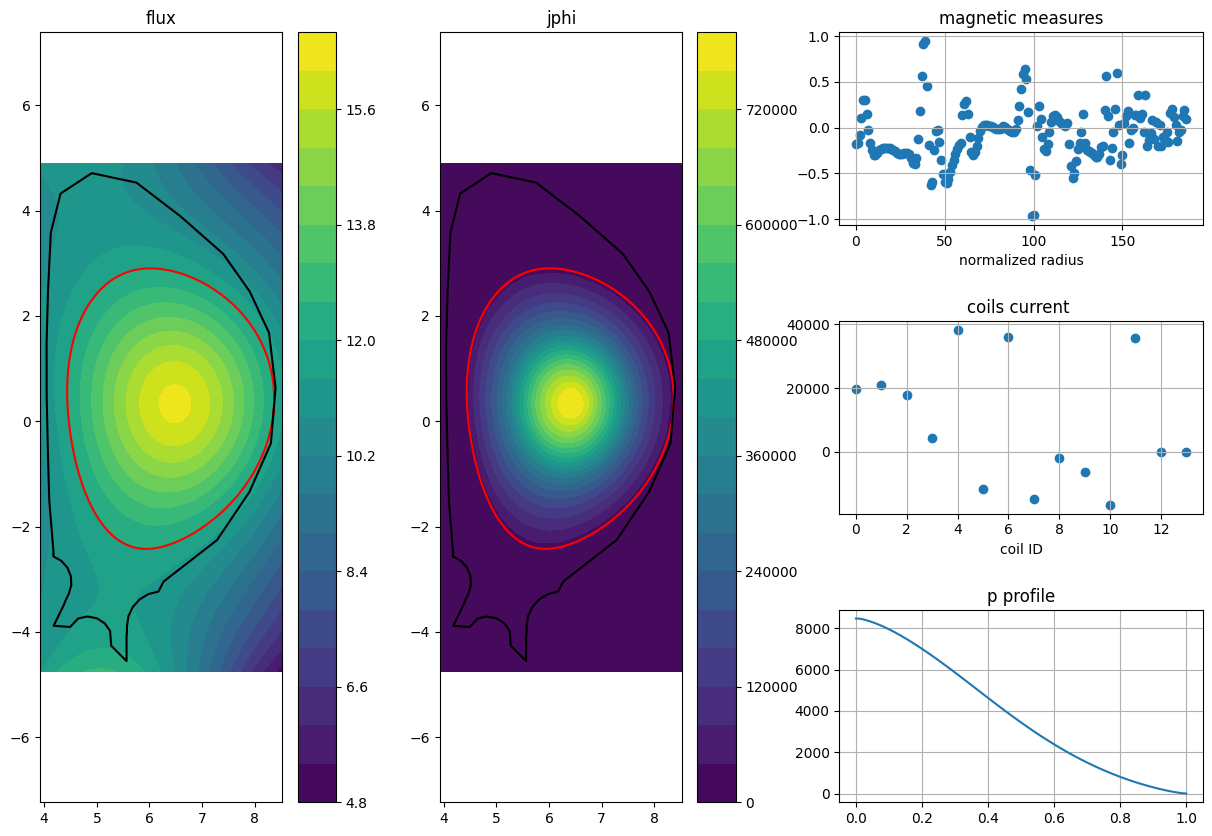

In [6]:
equilibrium = dataset[0]
plot_equilibrium(equilibrium)

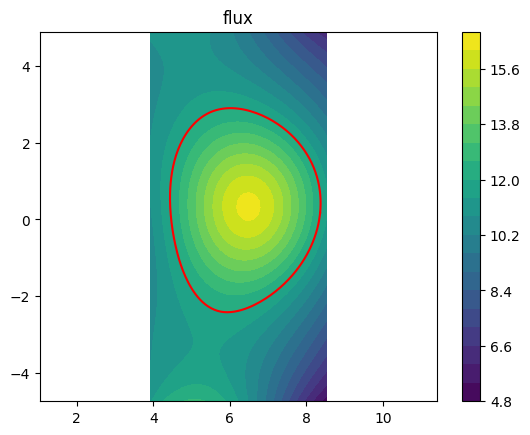

In [7]:
contourf(
    z = equilibrium.flux,
    RR = equilibrium.grid.r,
    ZZ = equilibrium.grid.z,
    separatrix=equilibrium.separatrix,
    title='flux'    
)

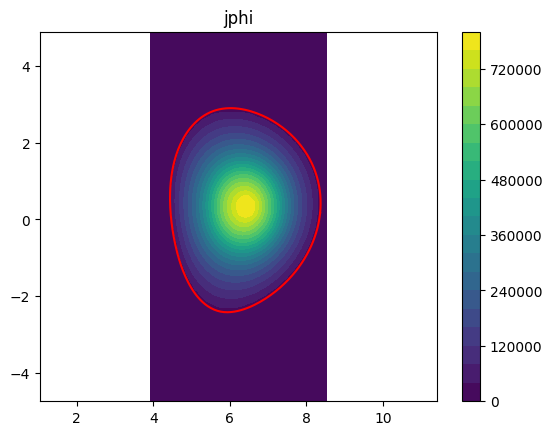

In [9]:
from iterlike_equil_dataset.constants import mu0

jphi = - equilibrium.rhs / (mu0 * equilibrium.grid.r)

contourf(
    z = jphi,
    RR = equilibrium.grid.r,
    ZZ = equilibrium.grid.z,
    separatrix=equilibrium.separatrix,
    title='jphi'    

)

In [20]:
import random
from datasets import Dataset
from typing import Iterable, List

idxs = random.sample(range(len(dataset)), 1000)
idxs = dataset.equil_data['is_diverted']


KeyError: "Column is_diverted not in the dataset. Current columns in the dataset: ['mag_measures', 'flux', 'rhs', 'coils_current', 'separatrix', 'id_diverted', 'p_profile']"

In [17]:

flux = dataset.equil_data['flux']
flux.shape
# def retrieve_rows(dataset: Dataset, indexes: Iterable[int], keys:List[str]):
#     """Retrieved n rows from the `dataset` for the specific keys."""
#     rows = [dataset[i] for i in indexes]
#     return np.array([row[key] for key in keys} for row in rows]

# flux = retrieve_rows(dataset.equil_data, indexes=idxs, keys = ['flux'])

(8192, 64, 64)

In [13]:
flux

[{'flux': array([[-2.4027128, -2.3104334, -2.2249997, ..., -9.169572 , -9.357143 ,
          -9.539855 ],
         [-2.5880063, -2.5044901, -2.4267814, ..., -8.909277 , -9.096826 ,
          -9.280861 ],
         [-2.7416134, -2.6665084, -2.5961864, ..., -8.67107  , -8.859032 ,
          -9.044633 ],
         ...,
         [-3.5951002, -3.551079 , -3.510503 , ..., -8.467021 , -8.606484 ,
          -8.742931 ],
         [-3.512007 , -3.4688077, -3.429623 , ..., -8.818548 , -8.954363 ,
          -9.08588  ],
         [-3.4079685, -3.3655574, -3.3277342, ..., -9.1942   , -9.326237 ,
          -9.452401 ]], shape=(64, 64), dtype=float32)},
 {'flux': array([[ -6.581954 ,  -6.45242  ,  -6.3345013, ..., -20.764309 ,
          -21.12424  , -21.474434 ],
         [ -7.091137 ,  -6.9653597,  -6.850136 , ..., -20.338633 ,
          -20.698887 , -21.051867 ],
         [ -7.5450935,  -7.4221683,  -7.308796 , ..., -19.957752 ,
          -20.319109 , -20.675282 ],
         ...,
         [ -8.558155 ,

In [ ]:

import random

idx = random.sample(range(len(dataset)), 1000)


flux = dataset['flux'][idx, ...]
jphi = equilibrium.jphi
coil_curr = equilibrium.coils_current
mag_measures = equilibrium.mag_measures
p_profile = equilibrium.p_profile
RR = equilibrium.grid.r
ZZ = equilibrium.grid.z
first_wall = equilibrium.first_wall
separatrix = equilibrium.separatrix

def contourf(z, RR, ZZ, title="", separatrix=None, first_wall=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    c = ax.contourf(RR, ZZ, z, 20)
    ax.axis("equal")
    plt.colorbar(c, ax=ax)
    if separatrix is not None:
        ax.plot(separatrix[:, 0], separatrix[:, 1], "r")
    if first_wall is not None:
        ax.plot(first_wall.r, first_wall.z, "k")
    ax.set_title(title)

# Create figure and master GridSpec
fig = plt.figure(figsize=(15, 10))
outer = gridspec.GridSpec(
    nrows=1, ncols=3, width_ratios=[1, 1, 1.2], wspace=0.3
)

# Contour plots (left and middle) take full height
ax1 = fig.add_subplot(outer[0, 0])
contourf(flux, RR, ZZ, separatrix=separatrix, first_wall=first_wall, title="flux", ax=ax1)

ax2 = fig.add_subplot(outer[0, 1])
contourf(jphi, RR, ZZ, separatrix=separatrix, first_wall=first_wall, title="jphi", ax=ax2)

# Right column: nested GridSpec for vertical stacking
inner = gridspec.GridSpecFromSubplotSpec(
    3, 1, subplot_spec=outer[0, 2], hspace=0.5
)

ax3 = fig.add_subplot(inner[0])
ax4 = fig.add_subplot(inner[1])
ax5 = fig.add_subplot(inner[2])

# plot measures
ax3.scatter(np.arange(mag_measures.shape[0]), mag_measures.reshape(-1, 1))
ax3.set_title("magnetic measures")
ax3.set_xlabel("sensor ID")
ax3.grid(True)

# plot currents
ax4.scatter(np.arange(coil_curr.shape[0]), coil_curr.reshape(-1, 1))
ax4.set_title("coils current ")
ax4.set_xlabel("coil ID")
ax4.grid(True)

# plot p profile
ax5.plot(np.linspace(0, 1, p_profile.shape[0]), p_profile.reshape(-1, 1))
ax5.set_title("p profile")
ax3.set_xlabel("normalized radius")
ax5.grid(True)

plt.show()
